In [1]:
# General libraries
import pandas as pd
import numpy as np

# Scikit Learn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn import metrics

# Scipy libraries
from scipy import stats

# Single import from another libraries
import seaborn as sns
import statsmodels.api as sm
import joblib
import warnings
warnings.filterwarnings('ignore')


# Utils functions
from utils.utils import kfold, get_adj_r2, read_datasets, plot_pred_expected_results

# Load Dataset

In [2]:
x_train, x_test, y_train, y_test = read_datasets(
    'x_train_2.csv',
    'x_test_2.csv',
    'y_train_2.csv',
    'y_test_2.csv'
)

In [3]:
x_train.head()

,dslf_fa13,fa_rep,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,lk_ball_wtd,omega,p_aa_pp,pro_close,rama_prepro,ref,time,yhh_planarity
0,0.22973,0.297071,0.801774,0.686648,0.810329,0.780078,0.771760,0.201707,0.734554,0.040848,0.712342,0.523591,0.0,0.013655
1,0.22973,0.278929,0.693164,0.630547,0.735858,0.733178,0.694929,0.074615,0.636059,0.065490,0.423793,0.334937,0.0,0.097689
2,0.22973,0.039392,0.991470,0.971738,0.936427,0.821288,0.917112,0.044517,0.954476,0.003597,0.268529,0.001079,0.0,0.002101
3,0.22973,0.454789,0.523125,0.461226,0.521223,0.576508,0.483125,0.798760,0.529375,0.816637,0.601882,0.801711,0.0,0.056723
4,0.22973,0.041516,0.970284,0.899250,0.963758,0.914094,0.911180,0.011580,0.907310,0.019308,0.267537,0.034116,0.0,0.003151


In [4]:
y_train.head()

,solubility
0,94
1,66
2,98
3,10
4,23


# Linear Regression (LR)

In [5]:
# The cross validation scheme to be used
folds = kfold()

In [6]:
# No texto dizer que foi usado os valores default e o LR foi usado como o limite inferior

# Create the Linear Regression model
# Use cross validation
# Check the R2 score for train and test


lm = LinearRegression()

scores = cross_validate(estimator=lm, X=x_train, y=y_train, cv=folds,
    scoring=('r2', 'neg_mean_squared_error'),
    return_train_score=True)

#print(scores.keys())
print("Train R2 score: {}".format(scores['train_r2']))
print("Test R2 score: {}".format(scores['test_r2']))

Train R2 score: [0.21291062 0.20531291 0.19530182 0.19964554 0.21213431 0.26819812
 0.21384886 0.21504394 0.20298601 0.199347  ]
Test R2 score: [ 0.13145059  0.14733488  0.26572906  0.21091189  0.11620462 -0.43059539
  0.10630805  0.08869533  0.18446871  0.23296503]


In [7]:
# Test the model

lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

-0.035173917162859114


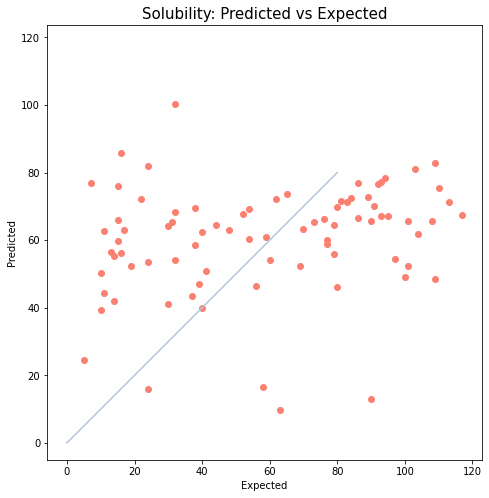

In [8]:
# Plot the R2 predicted and expected results
plot_pred_expected_results(y_test, y_pred)

In [9]:
# Check the Adjusted R2

n_observations = len(y_train)
n_independent_variables = x_train.shape[1]

for cross_val_r2 in scores['test_r2']:
    Adj_r2 = get_adj_r2(n_observations=n_observations, n_independent_variables=n_independent_variables, r2_score=cross_val_r2)
    print(Adj_r2)

0.09209884051113992
0.10870280233485063
0.2324611260493561
0.1751603238132171
0.07616211067061485
-0.49541201180659855
0.06581715310394709
0.04740644447204945
0.14751906847995266
0.1982126315745505


# Saving trained model

In [10]:
filename = '../models/lr_model_high_removed.joblib'
joblib.dump(lm, filename)

['../models/lr_model_high_removed.joblib']